# **Fashion MNIST**

### Importing some of the commonly used libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

## Getting the Data

The data consists of images of things as follows:

> **Label**	  **Description**



0.   T-shirt/top
1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankle boot

In [3]:
#training Data
df_train = pd.read_csv('fashion-mnist_train.csv')
#test data 
df_test = pd.read_csv('fashion-mnist_test.csv')

Taking a look into the data

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


### Dividing the data into train, test and cross-validation datasets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#creating an array for all the columns in the dataset
cl = []
for i in range(1,785):
  string = 'pixel'
  string = string + str(i)
  cl.append(string)

In [7]:
X = df_train[cl]
y = df_train['label']
X_test = df_test[cl]
y_test = df_test['label']

In [8]:
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2,random_state=101)

In [9]:
#Data Size
print('Train Data: ',len(X_train))
print('Cross-validation Data: ',len(X_cv))
print('Test Data: ',len(X_test))

Train Data:  48000
Cross-validation Data:  12000
Test Data:  10000


### Visualizing the data

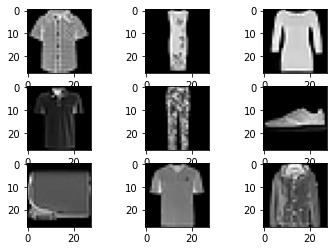

In [11]:
images = []
for i in range(9):
  arr = np.array(X_train.iloc[i])
  images.append(arr.reshape((28,28)))

for i in range(9):
    plt.subplot(331+i)
    plt.imshow(images[i],cmap=plt.get_cmap('gray')) 
plt.show()

## Feature Scaling

In [12]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_cv = scaler.transform(X_cv)

## Training the model

In [13]:
#importing the libraries to be used
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
#Using earlystopping in our neural network to avoid overfitting
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [38]:
model = Sequential()
model.add(Flatten())
model.add(Dense(784,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(196,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(49,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_cv,y_cv),verbose=1,callbacks=[earlystop])

Epoch 1/100
1500/1500 [==============================] - 13s 8ms/step - loss: 0.8450 - accuracy: 0.7011 - val_loss: 0.4455 - val_accuracy: 0.8407
Epoch 2/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4824 - accuracy: 0.8271 - val_loss: 0.3759 - val_accuracy: 0.8614
Epoch 3/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4314 - accuracy: 0.8466 - val_loss: 0.3630 - val_accuracy: 0.8698
Epoch 4/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3994 - accuracy: 0.8555 - val_loss: 0.3909 - val_accuracy: 0.8583
Epoch 5/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3890 - accuracy: 0.8591 - val_loss: 0.3609 - val_accuracy: 0.8738
Epoch 6/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3649 - accuracy: 0.8685 - val_loss: 0.3477 - val_accuracy: 0.8774
Epoch 7/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3556 - accuracy: 0.8704 - val_loss: 0.3367 -

### Analyising the results

In [39]:
loss_df = pd.DataFrame(model.history.history)

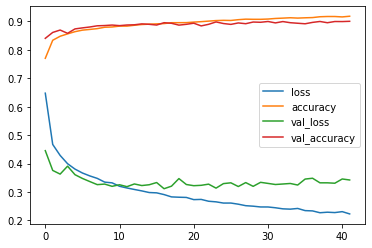

In [40]:
loss_df.plot()

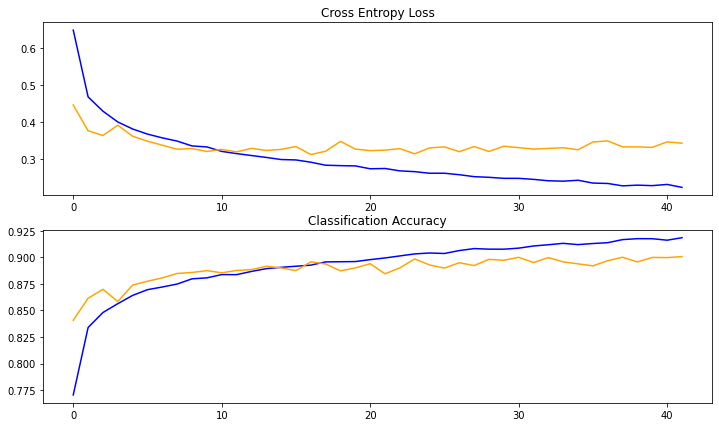

In [41]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

In [42]:
val_loss,val_accuracy = model.evaluate(X_cv,y_cv)
print(val_loss)
print(val_accuracy)

375/375 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.9006
0.34228524565696716
0.9005833268165588


## Evaluating the model

In [43]:
val_loss,val_accuracy = model.evaluate(X_test,y_test)
print(val_loss)
print(val_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8970
0.335506409406662
0.8970000147819519


### Saving the model

In [44]:
model.save('fashion_mnist_model.h5')

Trying the model 

In [92]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import image
from matplotlib import pyplot

float32
(512, 512, 4)


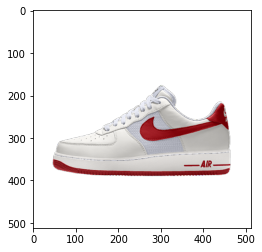

In [53]:
#the image to be classified
image = image.imread('sample_image.png')
# shape and type of the pixel array
print(image.dtype)
print(image.shape)
pyplot.imshow(image)

In [55]:
#converting the image to array
def load_image(filename):
	img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	#img = img / 255.0
	return img

In [56]:
def image_pred():
  img = load_image('sample_image.png')
  img = img.reshape((1,784))
  df_img = pd.DataFrame(img)
  df_img.columns = [cl] 
  df_img = scaler.transform(df_img)
  predict = np.argmax(model.predict(df_img),axis=-1)
  return predict

In [57]:
predict = image_pred()

In [58]:
print(predict)

[5]
